In [ ]:
# Import all necessary libraries
import pandas as pd
import os
import re
import itertools
import collections
from textblob import TextBlob
from functools import partial
import tweepy as tw
import json 
import pandas as pd
import scipy.stats
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import nltk
from nltk.corpus import stopwords\

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
data1 = pd.read_csv('/content/Data.csv')
df = data1

In [ ]:
# Textblob tweet sentiment analysis functions
def get_tweet_sentiment_value(Text):
  analysis = TextBlob(Text)
  return analysis.sentiment.polarity

def get_tweet_sentiment_category(Text): 
  ''' 
  Utility function to classify sentiment of passed tweet 
  using textblob's sentiment method 
  '''
  # create TextBlob object of passed tweet text 
  analysis = TextBlob(Text)
  # set sentiment 
  if analysis.sentiment.polarity > 0: 
    return 'positive'
  elif analysis.sentiment.polarity == 0: 
    return 'neutral'
  else: 
    return 'negative'

In [ ]:
# Compute the sentiment score and category and add it to the dataframe
df['TextBlob_sentiment_value'] = df['Text'].apply(get_tweet_sentiment_value)
df['TextBlob_sentiment_category'] = df['Text'].apply(get_tweet_sentiment_category)

In [ ]:
# Counts of each category for the sentiment, overall
pd.value_counts(df['TextBlob_sentiment_category'])

positive    2
Name: TextBlob_sentiment_category, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


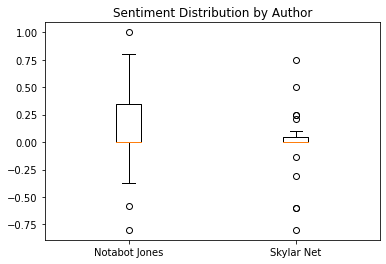

In [ ]:
# Make a boxplot for sentiment distribution by party
bot_ind = (df['Author'] == 'Notabot Jones')
net_ind = (df['Author'] == 'Skylar Net')
plt.boxplot([df['TextBlob_sentiment_value'][bot_ind], df['TextBlob_sentiment_value'][net_ind]])
plt.xticks(ticks=[1,2], labels=['Notabot Jones', 'Skylar Net'])
plt.title("Sentiment Distribution by Author")
plt.show()

In [ ]:
# Do a two-sample t-test to see if the sentiment scores differ by party
scipy.stats.ttest_ind(df['TextBlob_sentiment_value'][bot_ind], df['TextBlob_sentiment_value'][net_ind])

Ttest_indResult(statistic=2.044002632188598, pvalue=0.04513886918685393)

In [ ]:
# Which party has a higher sentiment?
print('Notabot Jones mean:', df['TextBlob_sentiment_value'][bot_ind].mean())
print('Skylar Net mean:', df['TextBlob_sentiment_value'][net_ind].mean())

Notabot Jones mean: 0.16517409673659672
Skylar Net mean: -0.01226190476190475


In [ ]:
# Aggregate counts of sentiment category by party
bot_sent_counts = df['TextBlob_sentiment_category'][bot_ind].value_counts()
net_sent_counts = df['TextBlob_sentiment_category'][net_ind].value_counts()
positive_counts = [bot_sent_counts['positive'], net_sent_counts['positive']]
neutral_counts = [bot_sent_counts['neutral'], net_sent_counts['neutral']]
negative_counts = [bot_sent_counts['negative'], net_sent_counts['negative']]

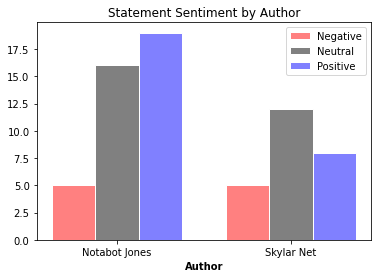

In [ ]:
# Create a barplot of the sentiment category counts by party
barWidth = 0.25
r1 = np.arange(2)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, negative_counts, color='#ff8080', width=barWidth, edgecolor='white', label='Negative')
plt.bar(r2, neutral_counts, color='#808080', width=barWidth, edgecolor='white', label='Neutral')
plt.bar(r3, positive_counts, color='#8080ff', width=barWidth, edgecolor='white', label='Positive')

plt.xlabel('Author', fontweight='bold')
plt.xticks([r + barWidth for r in range(2)], ['Notabot Jones', 'Skylar Net'])

plt.title('Statement Sentiment by Author')
plt.legend()
plt.show()

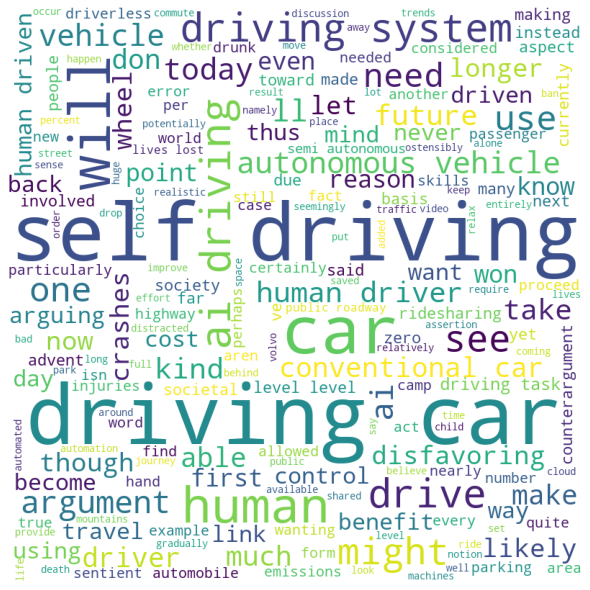

In [ ]:
# Python program to generate WordCloud 
%matplotlib inline
from matplotlib import pyplot as plt
#
# 

comment_words = '' 
custom_stopwords = ["go", "going"]
stopwords = set(STOPWORDS).union(custom_stopwords) 

# iterate through the csv file 
for val in df.Text: 
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [ ]:
!pip install afinn
from afinn import Afinn
afinn = Afinn(language='en')
afinn_wl_url = ('https://raw.githubusercontent.com'
                '/fnielsen/afinn/master/afinn/data/AFINN-111.txt')
afinn_wl_df = pd.read_csv(afinn_wl_url,
                          header=None, # no column names
                          sep='\t',  # tab sepeated
                          names=['term', 'value']) #new column names

seed = 808 # seed for sample so results are stable
afinn_wl_df.sample(10, random_state = seed)

     |████████████████████████████████| 61kB 4.6MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp37-none-any.whl size=53451 sha256=d33d3cf53b2f50f34c636fb29389dcd094ce114a6e4be497ba4a4e81471e93db
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


,term,value
1852,regret,-2
1285,indifferent,-2
681,disappoints,-2
770,doubts,-1
1644,outmaneuvered,-2
55,admit,-1
1133,haha,3
1160,haunt,-1
2435,wishing,1
21,abused,-3


In [ ]:
df['afinn_score'] = df['Text'].apply(afinn.score)

In [ ]:
pd.set_option('max_colwidth', 100)

In [ ]:
columns_to_display = ['Text', 'afinn_score']

df.sort_values(by='afinn_score')[columns_to_display].head(10)

,Text,afinn_score
1,The headlines proclaiming the emergence of self-driving cars are usually soaked in high praise f...,-22.0
0,"With more than 40 companies actively investing in autonomous vehicle technology, it’s fair to sa...",12.0


In [ ]:
df.sort_values(by='afinn_score')[columns_to_display].head(10)

,Text,afinn_score
1,The headlines proclaiming the emergence of self-driving cars are usually soaked in high praise f...,-22.0
0,"With more than 40 companies actively investing in autonomous vehicle technology, it’s fair to sa...",12.0


In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     |████████████████████████████████| 133kB 17.8MB/s 


In [ ]:
def vaderize(df, textfield):
    '''Compute the Vader polarity scores for a textfield.
    Returns scores and original dataframe.'''

    analyzer = SentimentIntensityAnalyzer()

    print('Estimating polarity scores for %d cases.' % len(df))
    sentiment = df[textfield].apply(analyzer.polarity_scores)

    # convert to dataframe
    sdf = pd.DataFrame(sentiment.tolist()).add_prefix('vader_')

    # merge dataframes
    df_combined = pd.concat([df, sdf], axis=1)
    return df_combined

In [ ]:
df_vaderized = vaderize(df, 'Text')
df_vaderized.head()

Estimating polarity scores for 2 cases.


,Text,Article,TextBlob_sentiment_value,TextBlob_sentiment_category,afinn_score,vader_neg,vader_neu,vader_pos,vader_compound
0,"With more than 40 companies actively investing in autonomous vehicle technology, it’s fair to sa...",5 Ways Self-Driving Cars Could Make Our World (And Our Lives) Better,0.111831,positive,12.0,0.063,0.808,0.129,0.9965
1,The headlines proclaiming the emergence of self-driving cars are usually soaked in high praise f...,Here’s Why Some Are Vehemently And Diametrically Opposed To Self-Driving Cars,0.057188,positive,-22.0,0.080,0.863,0.058,-0.9989


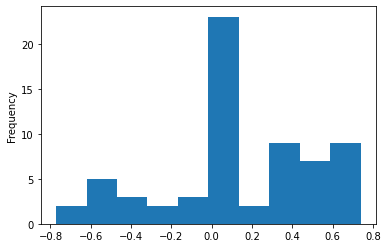

In [ ]:
%matplotlib inline

df_vaderized['vader_compound'].plot(kind='hist')

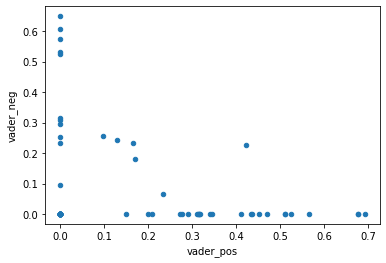

In [ ]:
df_vaderized.plot.scatter(x='vader_pos', y = 'vader_neg')

In [ ]:
df_vaderized.to_csv('C:/Users/KnudseQ/Desktop/file_name.csv')

FileNotFoundError: ignored

In [ ]:
data2 = pd.read_csv('/content/AI Sentiment Classification.csv')
df = data2

In [ ]:
# Aggregate counts of sentiment category by party
afinn_sent_counts = df['afinn_score'].value_counts()
text_sent_counts = df['TextBlob_sentiment_category'].value_counts()
vader_sent_counts = df['vader_compound'].value_counts()
positive_counts = [afinn_sent_counts['positive'], text_sent_counts['positive'],vader_sent_counts['positive']]
neutral_counts = [afinn_sent_counts['neutral'], text_sent_counts['neutral'],vader_sent_counts['neutral']]
negative_counts = [afinn_sent_counts['negative'], text_sent_counts['negative'],vader_sent_counts['negative']]

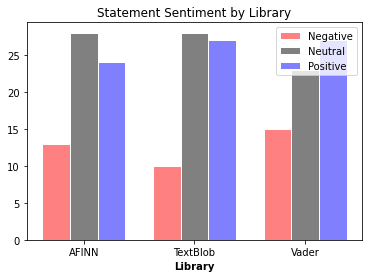

In [ ]:
# Create a barplot of the sentiment category counts by party
barWidth = 0.25
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, negative_counts, color='#ff8080', width=barWidth, edgecolor='white', label='Negative')
plt.bar(r2, neutral_counts, color='#808080', width=barWidth, edgecolor='white', label='Neutral')
plt.bar(r3, positive_counts, color='#8080ff', width=barWidth, edgecolor='white', label='Positive')

plt.xlabel('Library', fontweight='bold')
plt.xticks([r + barWidth for r in range(3)], ['AFINN', 'TextBlob','Vader'])

plt.title('Statement Sentiment by Library')
plt.legend()
plt.show()